# Selecting the files and masks relevant to Jonas

In [2]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import sys
from typing import Tuple, Set, List
from tqdm import tqdm
from pprint import pprint
import numpy as np

os.chdir('/data/l989o/deployed/a')
if '/data/l989o/a' in sys.path:
    sys.path.remove('/data/l989o/a')

In [3]:
original_masks_folder = 'data/OMEandSingleCellMasks/Basel_Zuri_masks'
original_ome_folder = 'data/OMEandSingleCellMasks/ome'

masks_paths: Set[str] = set([os.path.join(original_masks_folder, f) for f in os.listdir(original_masks_folder)])
ome_paths: Set[str] = set([os.path.join(original_ome_folder, f) for f in os.listdir(original_ome_folder)])

print(f'len(masks_paths) = {len(masks_paths)}, len(ome_paths) = {len(ome_paths)}')
        
ome_and_masks: Set[Tuple[str, str]] = set()
excluded_masks: Set[str] = set()
for masks in masks_paths:
    m = os.path.basename(masks)
    m = m.replace('_maks', '')
    m = m.replace('_mask', '')
    n = 0
    found = None
    for ome in ome_paths:
        if m in ome:
            n += 1
            found = ome
    assert n <= 1, n
    if n == 0:
        excluded_masks.add(masks)
    else:
        a = (found, masks)
        ome_and_masks.add(a)
        ome_paths.remove(found)
        
print(f'len(excluded_masks) = {len(excluded_masks)}, remaining ome paths: {len(ome_paths)}')
print(f'mapped: {len(ome_and_masks)}')

pprint(excluded_masks)
pprint(ome_paths)

len(masks_paths) = 746, len(ome_paths) = 746
len(excluded_masks) = 11, remaining ome paths: 11
mapped: 735
{'data/OMEandSingleCellMasks/Basel_Zuri_masks/BaselTMA_SP41_33.475kx12.66ky_8500x8500_2_20170905_Liver_Liver_X1Y1_2_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/BaselTMA_SP41_33.475kx12.66ky_8500x8500_2_20170905_Liver_Liver_X2Y1_14_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/BaselTMA_SP42_39.8kx13.885ky_7000x7000_2_20179015_Liver_Liver_X2Y1_92_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/BaselTMA_SP43_29.3kx15.5ky_7000x8000_3_20170928_Liver_Liver_X1Y1_3_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/BaselTMA_SP43_29.3kx15.5ky_7000x8000_3_20170928_Liver_Liver_X2Y1_90_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/ZTMA208_slide_13.25kx21.95ky_7000x7000_9_20171115_374_control_Cy15x6_465_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/ZTMA208_slide_13.25kx21.95ky_700

In [5]:
import hashlib

def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def md5_of_jonas_ome(ome):
    filename = os.path.basename(ome)
    return 'skipping the file'

def md5_of_jonas_masks(masks):
    filename = os.path.basename(masks)
    return 'skipping the file'

In [6]:
for ome, masks in ome_and_masks:
    print(os.path.basename(ome))
    print(os.path.basename(masks))
    print()
    break

BaselTMA_SP41_23.475kx17.66ky_10000x5000_12_20170905_57_37_X7Y6_22_a0_full.tiff
BaselTMA_SP41_23.475kx17.66ky_10000x5000_12_20170905_57_37_X7Y6_22_a0_full_maks.tiff



In [7]:
used_also_by_jonas: List[bool] = []

for ome, masks in tqdm(ome_and_masks):
    md5_ome = md5(ome)
    md5_masks = md5(masks)
    
    s = 'skipping the file'
    
    md5_jonas_ome = md5_of_jonas_ome(ome)
    md5_jonas_masks = md5_of_jonas_masks(masks)
    
    assert md5_jonas_ome != s and md5_jonas_masks != s or md5_jonas_ome == s and md5_jonas_masks == s
    
    if md5_jonas_ome != 'skipping the file':
        assert md5_ome == md5_jonas_ome
        assert md5_masks == md5_jonas_masks
        used_also_by_jonas.append(True)
    else:
        used_also_by_jonas.append(False)
        
    break
used_also_by_jonas = [False] * len(ome_and_masks)
for i in range(10):
    used_also_by_jonas[i] = True
# used_also_by_jonas[1] = True
# used_also_by_jonas[2] = True

  0%|          | 0/735 [00:00<?, ?it/s]


labels are NOT contiguous for mask BaselTMA_SP43_22.8kx15ky_7000x8000_4_20170928_52_103_X6Y4_150_a0_full_maks.tiff


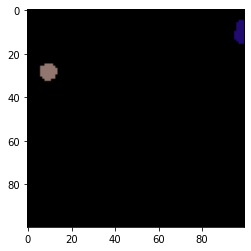

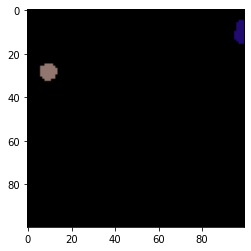

In [8]:
import tifffile
import skimage.measure
import matplotlib.pyplot as plt
import random

N_COLORS = 100
random_colors = np.random.rand(N_COLORS, 3)

for ome, masks in ome_and_masks: 
    if random.randint(0, 10) == 10:
        o = tifffile.imread(ome)
        m = tifffile.imread(masks)
        labels_are_contiguous = len(set(np.unique(m)).symmetric_difference(set(range(max(np.unique(m)) + 1)))) == 0
        if not labels_are_contiguous:
            print(f'labels are NOT contiguous for mask {os.path.basename(masks)}')
        else:
            print(f'labels are contiguous for mask {os.path.basename(masks)}')
        
        def black_background_and_colored_cells(x):
            background = x == 0
            colored = random_colors[x % N_COLORS]
            colored[background] = np.array([0, 0, 0])
            return colored
        
        # this also leads to a cell relabeling because the labels are not contiguous!
        new_m = skimage.measure.label(m, connectivity=1)
        plt.figure()
        plt.imshow(black_background_and_colored_cells(m)[:100, :100])
        plt.show()
        plt.figure()
        plt.imshow(black_background_and_colored_cells(new_m)[:100, :100])
        plt.show()
        break

# Extracting cell tiles and preprocessing them

In [9]:
CHANNEL_NAMES = ['H3tot', 'H3met', 'CK5', 'Fibronectin', 'CK19', 'CK8/18', 'TWIST1', 'CD68', 'CK14', 'SMA',
                 'Vimentin', 'Myc', 'HER2', 'CD3', 'H3phospho', 'ERK1/2', 'SLUG', 'ER', 'PR', 'p53', 'CD44',
                 'EpCAM', 'CD45', 'GATA3', 'CD20', 'betaCatenin', 'CAIX', 'Ecadherin', 'Ki67', 'EGFR', 'S6',
                 'Sox9', 'vWf_CD31', 'mTOR', 'CK7', 'panCK', 'cPARP_cCasp3', 'DNA1', 'DNA2']

CHANNELS_TO_KEEP = [8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                    23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                    36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]

assert len(CHANNEL_NAMES) == len(CHANNELS_TO_KEEP)

In [10]:
quantiles_for_normalization = np.array([4.0549, 1.8684, 1.3117, 3.8141, 2.6172, 3.1571, 1.4984, 1.8866, 1.2621,
                                    3.7035, 3.6496, 1.8566, 2.5784, 0.9939, 1.4314, 2.1803, 1.8672, 1.6674,
                                    2.3555, 0.8917, 5.1779, 1.8002, 1.4042, 2.3873, 1.0509, 1.0892, 2.2708,
                                    3.4417, 1.8348, 1.8449, 2.8699, 2.2071, 1.0464, 2.5855, 2.0384, 4.8609,
                                    2.0277, 3.3281, 3.9273])
COOL_CHANNELS = np.array([0, 10, 20])
cool_quantiles = quantiles_for_normalization[COOL_CHANNELS]

def preprocess_ome(ome):
    assert ome.shape[2] == len(quantiles_for_normalization)
    ome = ome[:, :, COOL_CHANNELS]
    ome = np.arcsinh(ome)
    ome /= cool_quantiles
    ome = ome.astype(np.float32)
#     print(ome.shape, ome.dtype)
    return ome

# _ = preprocess_ome(square_ome)

In [14]:
from data2 import file_path
import h5py
from scipy.ndimage import center_of_mass
import math

DEBUG = False
l = 32

os.makedirs(file_path('processing_for_jonas'), exist_ok=True)
f_out = file_path('processing_for_jonas/raw_data_into_padded_cells.hdf5')
k = 0

with h5py.File(f_out, 'w') as f5_out:
    for i, (ome, masks) in enumerate(tqdm(ome_and_masks)):
        if used_also_by_jonas[i]:
            o = tifffile.imread(ome)[CHANNELS_TO_KEEP, :, :]
            o = np.moveaxis(o, 0, 2)
            m = tifffile.imread(masks)
#             # labels are often non contiguous, you can check that with this
#             labels_are_contiguous = len(set(np.unique(m)).symmetric_difference(set(range(max(np.unique(m)) + 1)))) == 0
            square_omes = []
            square_masks = []
            mean_omes = []
            max_label = np.max(m)            
            for cell_label in range(max_label + 1):
#                 if k > 50:
#                     break
                k += 1
                skip = False
                if cell_label == 0:
                    skip = True
                z = m == cell_label
                p0 = np.sum(z, axis=0)
                p1 = np.sum(z, axis=1)
                w0, = np.where(p0 > 0)
                w1, = np.where(p1 > 0)
                if len(w0) * len(w1) == 0:
                    skip = True
                
                square_ome = np.zeros((l, l, o.shape[2]))
                square_mask = np.zeros((l, l))
                if not skip:
                    a0 = w0[0]
                    b0 = w0[-1] + 1
                    a1 = w1[0]
                    b1 = w1[-1] + 1
                    y = z[a1: b1, a0: b0]
                    y_center = np.array(center_of_mass(y))
                    if DEBUG:
#                         z_center = center_of_mass(z)
#                         plt.figure(figsize=(20, 20))
#                         plt.imshow(z)
#                         plt.scatter(z_center[1], z_center[0], color='red', s=1)
#                         plt.show()                        

                        plt.figure(figsize=(5, 5))
                        plt.imshow(y)
                        plt.scatter(y_center[1], y_center[0], color='red', s=1)
                        plt.show()
                    r = l / 2                
                    
                    def get_coords_for_padding(src_shape, src_center):
                        def f(src_l: int, src_c: float):
                            a = math.floor(src_c - r)
                            b = math.ceil(src_c + r)
                            if a < 0:
                                c = - a
                                a = 0
                            else:
                                c = 0
                            if b > src_l:
                                b = src_l
#                             if b > l:
#                                 b = l
                            src_a = a
                            src_b = b
                            des_a = c
                            des_b = des_a + b - a
                            
                            if des_b > l:
                                s = des_b - l
                                src_b -= s
                                des_b -= s
                            assert src_b - src_a == des_b - des_a
#                             if k == 3:
#                                 breakpoint()
                            return src_a, src_b, des_a, des_b
                        src0_a, src0_b, des0_a, des0_b = f(src_shape[0], src_center[0])
                        src1_a, src1_b, des1_a, des1_b = f(src_shape[1], src_center[1])
                        return src0_a, src0_b, src1_a, src1_b, des0_a, des0_b, des1_a, des1_b
                    
                    src0_a, src0_b, src1_a, src1_b, des0_a, des0_b, des1_a, des1_b = get_coords_for_padding(y.shape, y_center)
                    
                    assert b1 - a1 >= src0_a + 1 and b1 - a1 >= src0_b and src0_a >= 0 and src0_b > 0 and src0_b > src0_a, (a1, b1, src0_a, src0_b)
                    assert b0 - a0 >= src1_a + 1 and b0 - a0 >= src1_b and src1_a >= 0 and src1_b > 0 and src1_b > src1_a, (a0, b0, src1_a, src1_b)
                    try:
                        square_ome[des0_a:des0_b, des1_a:des1_b, :] = o[a1:b1, a0:b0, :][src0_a:src0_b, src1_a:src1_b, :]
                        square_mask[des0_a:des0_b, des1_a:des1_b] = y[src0_a:src0_b, src1_a:src1_b]
                    except ValueError as e:
                        print(e)
                        breakpoint()
                preprocessed_ome = preprocess_ome(square_ome)
                square_omes.append(preprocessed_ome)
                square_masks.append(square_mask)
                means = np.mean(preprocessed_ome, axis=(0, 1))
                mean_omes.append(means)
            if DEBUG:
                plt.figure()
                plt.imshow(square_mask)
                plt.scatter(r, r, color='blue', s=1)
                plt.show()
            f5_out[f'omes/{os.path.basename(ome)}'] = np.stack(square_omes)
            f5_out[f'masks/{os.path.basename(ome)}'] = np.stack(square_masks)
            f5_out[f'means/{os.path.basename(ome)}'] = np.stack(mean_omes)

100%|██████████| 735/735 [00:18<00:00, 39.51it/s]


In [15]:
f = file_path('processing_for_jonas/raw_data_into_padded_cells.hdf5')
with h5py.File(f, 'r') as f5:
    print(f5['omes'].keys())
#     print(f5['masks/ZTMA208_slide_28.23kx22.4ky_7000x7000_5_20171115_74_3_Ay10x2_105_a0_full_maks.tiff'][...].shape)

<KeysViewHDF5 ['BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20170905_128_177_X16Y5_254_a0_full.tiff', 'BaselTMA_SP41_23.475kx17.66ky_10000x5000_12_20170905_57_37_X7Y6_22_a0_full.tiff', 'BaselTMA_SP41_23.475kx17.66ky_10000x5000_12_20170905_65_57_X8Y6_36_a0_full.tiff', 'BaselTMA_SP41_33.475kx12.66ky_8500x8500_2_20170905_83_218_X10Y4_244_a0_full.tiff', 'BaselTMA_SP42_39.8kx13.885ky_7000x7000_2_20179015_6_145_X1Y4_68_a0_full.tiff', 'BaselTMA_SP43_16.3kx14.5ky_7000x8000_5_20170928_25_235_X11Y2_213_a0_full.tiff', 'BaselTMA_SP43_22.8kx15ky_7000x8000_4_20170928_52_103_X6Y4_150_a0_full.tiff', 'ZTMA208_slide_13.25kx14.95ky_7000x7000_8_20171115_279_14_Cy3x7_221_a0_full.tiff', 'ZTMA208_slide_20.73kx15.16ky_7000x7000_6_20171115_174_36_By6x6_381_a0_full.tiff', 'ZTMA208_slide_20.73kx22.16ky_7000x7000_7_20171115_248_35_By15x8_471_a0_full.tiff']>


# Passing the cell cells to the model

In [16]:
import torch
from torch.utils.data import DataLoader, Dataset
from models.ae_conv_vae_lightning import VAE, RGBCells
import numpy as np
import pl_bolts.utils
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.utils import make_grid
import PIL
import random
from torch import nn

Global seed set to 1234


In [17]:
model_path = '/data/l989o/spatial_uzh/data/spatial_uzh_processed/a/checkpoints/resnet_vae/version_115/checkpoints'
l = os.listdir(model_path)
assert len(l) == 1
assert l[0].endswith('.ckpt')
l

['epoch=19-step=8739.ckpt']

In [18]:
checkpoint = os.path.join(model_path, l[0])

In [19]:
from models.ae_conv_vae_lightning import VAE

model = VAE.load_from_checkpoint(checkpoint)

In [33]:
class PerImageDataset(Dataset):
    def __init__(self):
        f = file_path('processing_for_jonas/raw_data_into_padded_cells.hdf5')
        self.f5 = h5py.File(f, 'r')
        a = len(self.f5['omes'].keys())
        b = len(self.f5['masks'].keys())
        assert a == b
        self.ome_filenames = list(self.f5['omes'].keys())
        self.n = len(self.ome_filenames)
    
    def __len__(self):
        return self.n
    
    def __getitem__(self, i):
        ome_filename = self.ome_filenames[i]
        ome = self.f5[f'omes/{ome_filename}'][...]
        ome = np.transpose(ome, (0, 3, 1, 2))
        masks = self.f5[f'masks/{ome_filename}'][...]
        masks = np.expand_dims(masks, 1).astype(np.float32)
        means = self.f5[f'means/{ome_filename}'][...]
        return ome, masks, ome_filename, means

            
ds = PerImageDataset()
print(len(ds))
print(ds[0][0].shape, ds[0][1].shape, ds[0][2])

10
(2728, 3, 32, 32) (2728, 1, 32, 32) BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20170905_128_177_X16Y5_254_a0_full.tiff


In [34]:
print(model.negative_binomial_p_logit)
print(torch.sigmoid(model.negative_binomial_p_logit))

Parameter containing:
tensor([-4.9214, -4.6090, -4.8541], device='cuda:1', requires_grad=True)
tensor([0.0072, 0.0099, 0.0077], device='cuda:1', grad_fn=<SigmoidBackward>)


In [22]:
all_originals = []
all_originals_masked = []
all_reconstructed = []
all_reconstructed_masked = []
mask_color = torch.tensor([x / 255 for x in [254, 112, 31]]).float()
new_size = (128, 128)
upscale = transforms.Resize(new_size, interpolation=PIL.Image.NEAREST)
l = ds[0][0].shape[2]
full_mask = torch.tensor([[mask_color.tolist() for _ in range(l)] for _ in range(l)])
full_mask = upscale(full_mask.permute(2, 0, 1))
n = 15
with torch.no_grad():
    batch = ds[0]
    omes = batch[0]
    masks = batch[1]
    assert len(omes.shape) == 4
    assert len(omes) >= n
    data = torch.tensor(omes[:n]).to(model.device)
    masks_data = torch.tensor(masks[:n]).to(model.device)
    pred = model.forward(data, masks_data)[0]
n_channels = data.shape[1]

all_original_c = {c: [] for c in range(n_channels)}
all_original_masked_c = {c: [] for c in range(n_channels)}
all_reconstructed_c = {c: [] for c in range(n_channels)}
all_reconstructed_masked_c = {c: [] for c in range(n_channels)}

for i in range(n):
    original = data[i].cpu().permute(1, 2, 0) * cool_quantiles
    r_hat = pred[i].cpu().permute(1, 2, 0)
    p = model.boosted_sigmoid(model.negative_binomial_p_logit).cpu().detach()
    mean = model.negative_binomial_mean(r=r_hat, p=p)
    reconstructed = mean * cool_quantiles
    
    a_original = original.amin(dim=(0, 1))
    b_original = original.amax(dim=(0, 1))
    m = masks_data[i].cpu().bool()
    mm = torch.squeeze(m, 0)
    reconstructed_flattened = torch.reshape(reconstructed, (-1, reconstructed.shape[-1]))
    mask_flattened = mm.flatten()
    if mask_flattened.sum() != 0:
        a_reconstructed = reconstructed_flattened[mask_flattened, :].amin(dim=0)
        b_reconstructed = reconstructed_flattened[mask_flattened, :].amax(dim=0)
        a = torch.min(a_original, a_reconstructed)
        b = torch.max(b_original, b_reconstructed)

        original = ((original - a) / (b - a)).float()
        reconstructed = ((reconstructed - a) / (b - a)).float()

        mm_not = torch.logical_not(mm)
        assert torch.all(reconstructed[mm, :] >=0.)
        assert torch.all(reconstructed[mm, :] <= 1.)
        reconstructed = torch.clamp(reconstructed, 0., 1.)

        original_masked = original.clone()
        original_masked[mm_not, :] = mask_color
        reconstructed_masked = reconstructed.clone()
        reconstructed_masked[mm_not, :] = mask_color

        upscaled_mm = upscale(m).squeeze(0)
        upscaled_mm_not = torch.logical_not(upscale(m).squeeze(0))
        for c in range(n_channels):
            original_c = original[:, :, c]
            original_c = torch.stack([original_c] * 3, dim=2)

            reconstructed_c = reconstructed[:, :, c]
            reconstructed_c = torch.stack([reconstructed_c] * 3, dim=2)

            def f(t):
                t = t.permute(2, 0, 1)
                t = upscale(t)
                return t

            def overlay_mask(t):
                t = t.clone()
                t[mm_not, :] = mask_color
                return t

            a_original_c = original_c.amin(dim=(0, 1))
            b_original_c = original_c.amax(dim=(0, 1))
            reconstructed_flattened_c = torch.reshape(reconstructed_c, (-1, reconstructed_c.shape[-1]))
            mask_flattened = mm.flatten()
            a_reconstructed_c = reconstructed_flattened_c[mask_flattened, :].amin(dim=0)
            b_reconstructed_c = reconstructed_flattened_c[mask_flattened, :].amax(dim=0)
            a_c = torch.min(a_original_c, a_reconstructed_c)
            b_c = torch.max(b_original_c, b_reconstructed_c)

            t = (original_c - a_c) / (b_c - a_c)
            all_original_c[c].append(f(t))
            all_original_masked_c[c].append(f(overlay_mask(t)))
            t = (reconstructed_c - a_c) / (b_c - a_c)
            all_reconstructed_c[c].append(f(t))
            all_reconstructed_masked_c[c].append(f(overlay_mask(t)))

        original = upscale(original.permute(2, 0, 1))
        reconstructed = upscale(reconstructed.permute(2, 0, 1))
        original_masked = upscale(original_masked.permute(2, 0, 1))
        reconstructed_masked = upscale(reconstructed_masked.permute(2, 0, 1))

        all_originals.append(original)
        all_reconstructed.append(reconstructed)
        all_originals_masked.append(original_masked)
        all_reconstructed_masked.append(reconstructed_masked)
    else:
        all_originals.append(upscale(original.permute(2, 0, 1)))
        all_reconstructed.append(upscale(reconstructed.permute(2, 0, 1)))
        all_originals_masked.append(full_mask)
        all_reconstructed_masked.append(full_mask)
        for c in range(n_channels):
            all_original_c[c].append(full_mask)
            all_reconstructed_c[c].append(full_mask)
            all_original_masked_c[c].append(full_mask)
            all_reconstructed_masked_c[c].append(full_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2082, 1952, 3) 0.0 1.3660937216281892


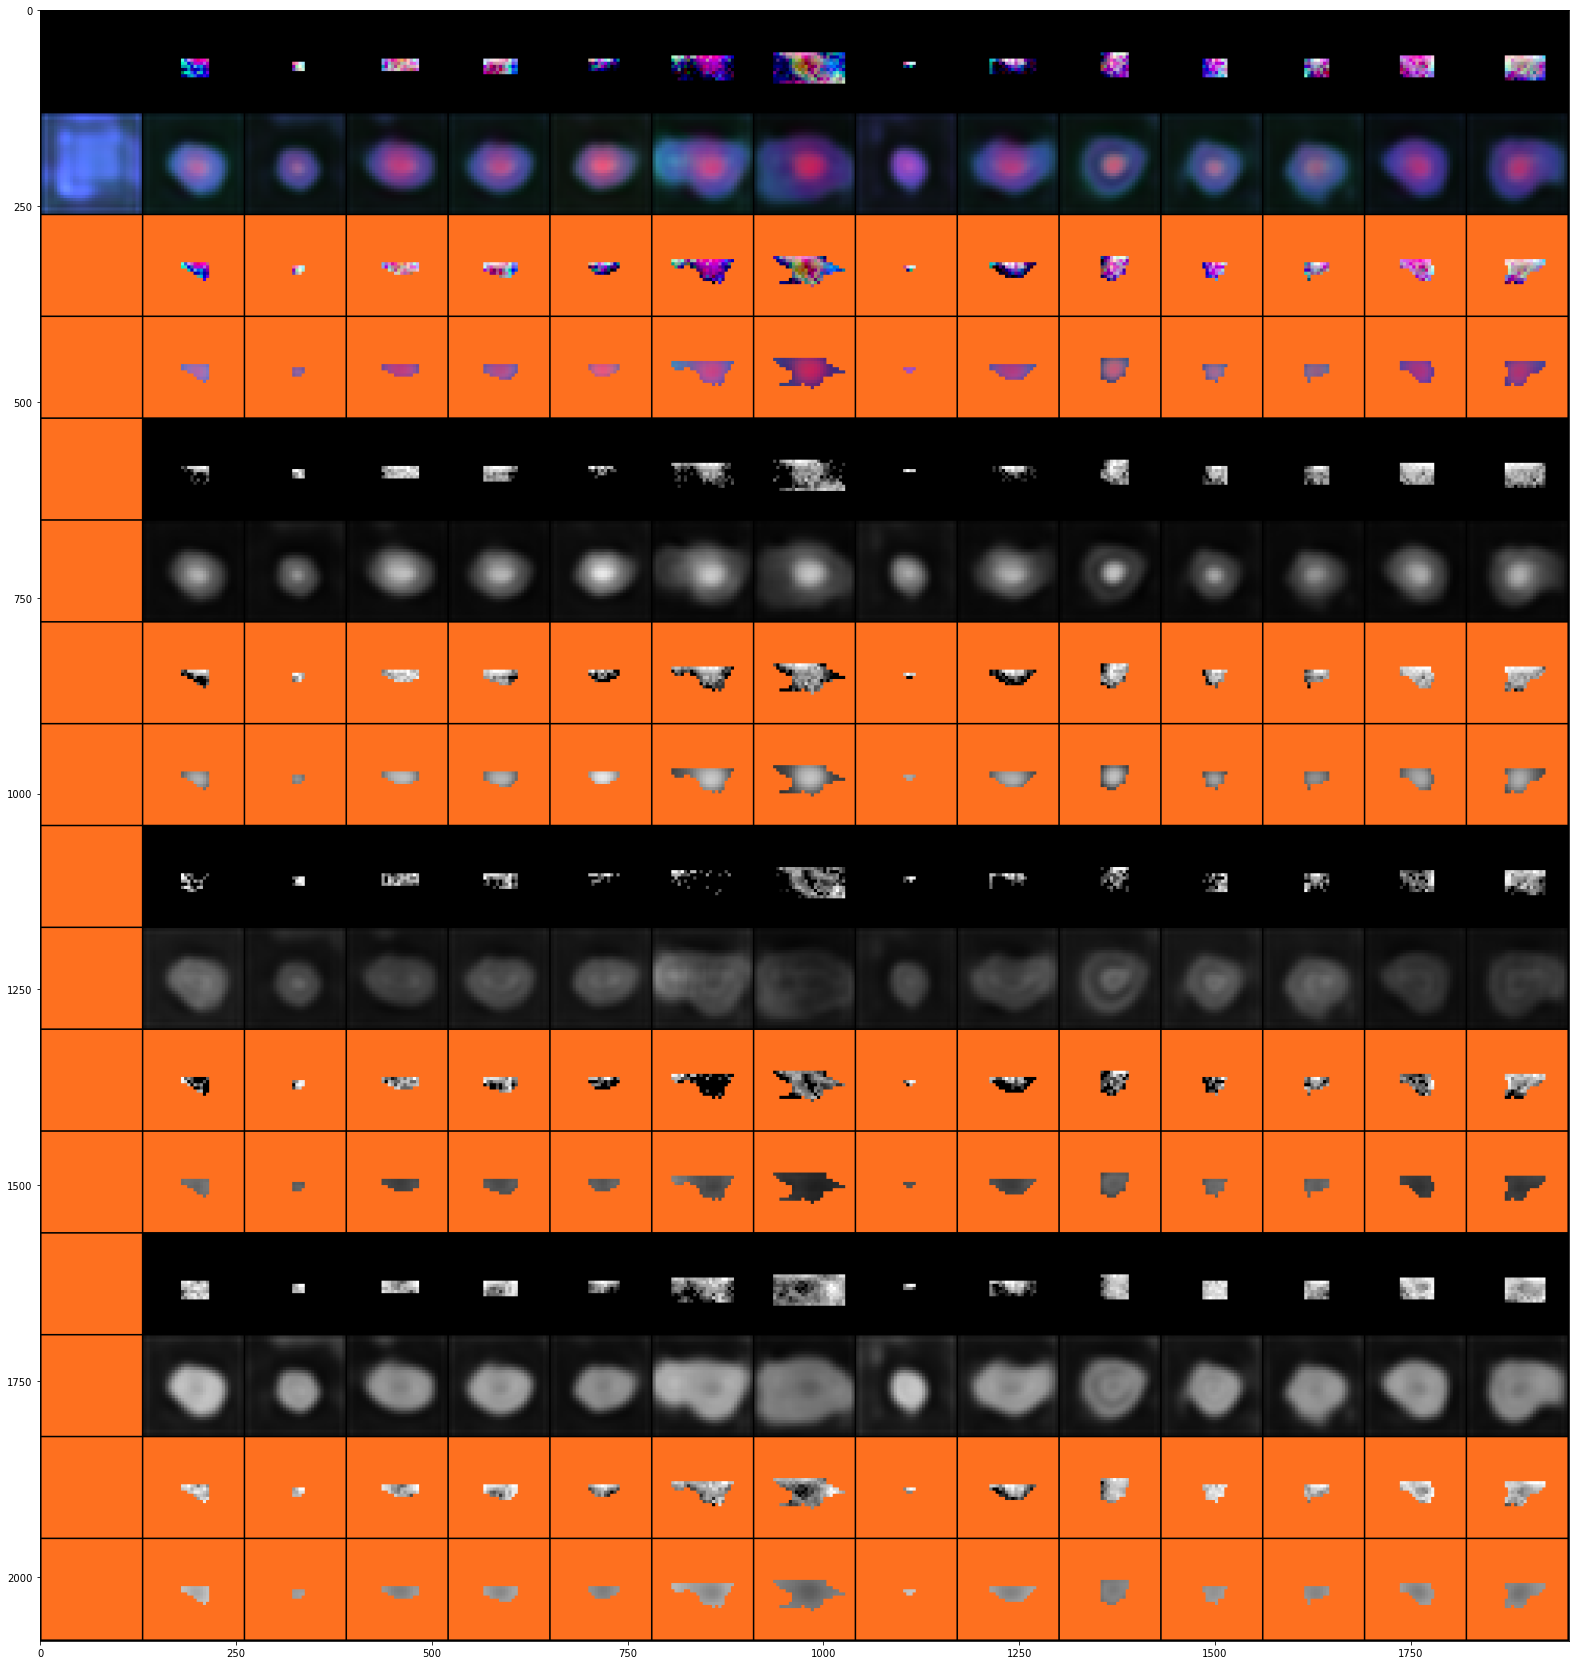

In [23]:
l = all_originals + all_reconstructed + all_originals_masked + all_reconstructed_masked
for c in range(n_channels):
    l += (all_original_c[c] + all_reconstructed_c[c] + all_original_masked_c[c] + all_reconstructed_masked_c[c])
    
img = make_grid(l, nrow=n)
plt.figure(figsize=(30, 30))
im = img.permute(1, 2, 0).numpy()
print(im.shape, im.min(), im.max())
plt.imshow(im)
plt.show()

In [31]:
model = model.cuda(1)
model.device

device(type='cuda', index=1)

In [36]:
from tqdm import tqdm

n = 0
mus = []
stds = []
means = []
with torch.no_grad():
    m = len(ds)
    for i in tqdm(range(m)):
        batch = ds[i]
        omes = batch[0]
        masks = batch[1]
        my_means = batch[3]
        means.append(my_means)
        assert len(omes.shape) == 4
        data = torch.tensor(omes).to(model.device)
        masks_data = torch.tensor(masks).to(model.device)
        data = data.to(model.device)
        masks_data = masks_data.to(model.device)
        pred, mu, std, _ = model.forward(data, masks_data)
        mus.append(mu.cpu())
        stds.append(std.cpu())
        n += len(mu)
        print(n)

 10%|█         | 1/10 [00:02<00:20,  2.33s/it]

2728


 20%|██        | 2/10 [00:04<00:18,  2.36s/it]

5612


 30%|███       | 3/10 [00:05<00:13,  1.97s/it]

6878


 40%|████      | 4/10 [00:07<00:12,  2.00s/it]

9389


 50%|█████     | 5/10 [00:10<00:11,  2.27s/it]

12757


 70%|███████   | 7/10 [00:13<00:05,  1.79s/it]

16277
16465


 80%|████████  | 8/10 [00:15<00:03,  1.64s/it]

18006


 90%|█████████ | 9/10 [00:15<00:01,  1.29s/it]

18656


100%|██████████| 10/10 [00:16<00:00,  1.64s/it]

19578


In [47]:
all_mus = torch.cat(mus, dim=0)
all_stds = torch.cat(stds, dim=0)
all_means = np.concatenate(means, axis=0)
print(all_mus.shape)
print(all_stds.shape)
print(all_means.shape)

torch.Size([19578, 64])
torch.Size([19578, 64])
(19578, 3)


In [50]:
print(torch.sum(all_mus.isinf()))
print(torch.sum(all_mus.isnan()))
print(torch.sum(all_stds.isinf()))
print(torch.sum(all_stds.isnan()))
print(np.sum(np.isinf(all_means)))
print(np.sum(np.isnan(all_means)))

tensor(0)
tensor(0)
tensor(0)
tensor(0)
0
0


In [51]:
import scanpy as sc
import anndata as ad

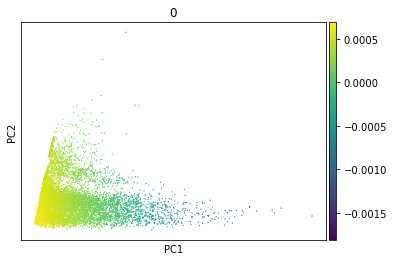

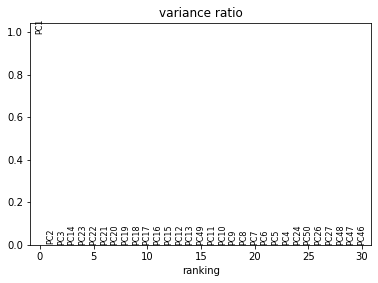

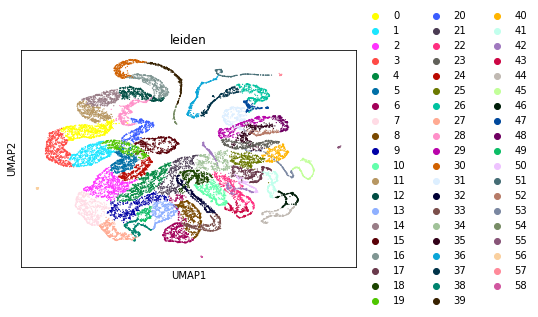

In [52]:
a = ad.AnnData(all_mus.numpy())

sc.tl.pca(a, svd_solver='arpack')
sc.pl.pca(a, color='0')
sc.pl.pca_variance_ratio(a)
# sc.pl.pca_variance_ratio(a, log=True)
sc.pp.neighbors(a)
sc.tl.leiden(a)
sc.tl.umap(a)
sc.pl.umap(a, color='leiden')

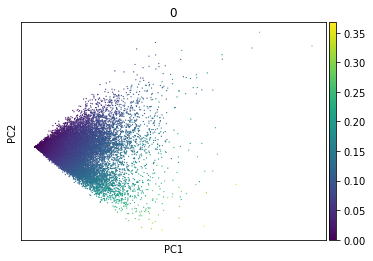

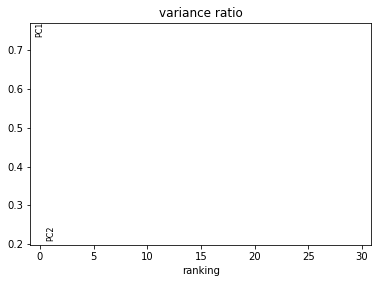

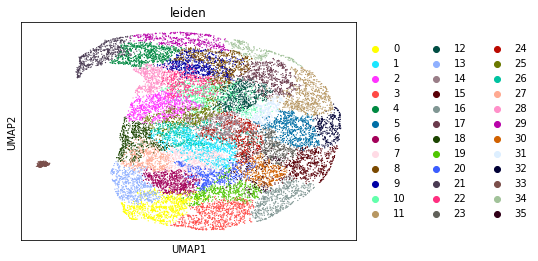

In [53]:
a = ad.AnnData(all_means)

sc.tl.pca(a, svd_solver='arpack')
sc.pl.pca(a, color='0')
sc.pl.pca_variance_ratio(a)
# sc.pl.pca_variance_ratio(a, log=True)
sc.pp.neighbors(a)
sc.tl.leiden(a)
sc.tl.umap(a)
sc.pl.umap(a, color='leiden')

In [56]:
begins = []
ends = []
ome_filenames = []

last_end = 0
for i in range(len(ds)):
    ome, masks, ome_filename, means = ds[i]
    begin = last_end
    n = len(ome)
    end = begin + n
    last_end = end
    begins.append(begin)
    ends.append(end)
    ome_filenames.append(ome_filename)
    
print(begins)
print(ends)
print(ome_filenames)

[0, 2728, 5612, 6878, 9389, 12757, 16277, 16465, 18006, 18656]
[2728, 5612, 6878, 9389, 12757, 16277, 16465, 18006, 18656, 19578]
['BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20170905_128_177_X16Y5_254_a0_full.tiff', 'BaselTMA_SP41_23.475kx17.66ky_10000x5000_12_20170905_57_37_X7Y6_22_a0_full.tiff', 'BaselTMA_SP41_23.475kx17.66ky_10000x5000_12_20170905_65_57_X8Y6_36_a0_full.tiff', 'BaselTMA_SP41_33.475kx12.66ky_8500x8500_2_20170905_83_218_X10Y4_244_a0_full.tiff', 'BaselTMA_SP42_39.8kx13.885ky_7000x7000_2_20179015_6_145_X1Y4_68_a0_full.tiff', 'BaselTMA_SP43_16.3kx14.5ky_7000x8000_5_20170928_25_235_X11Y2_213_a0_full.tiff', 'BaselTMA_SP43_22.8kx15ky_7000x8000_4_20170928_52_103_X6Y4_150_a0_full.tiff', 'ZTMA208_slide_13.25kx14.95ky_7000x7000_8_20171115_279_14_Cy3x7_221_a0_full.tiff', 'ZTMA208_slide_20.73kx15.16ky_7000x7000_6_20171115_174_36_By6x6_381_a0_full.tiff', 'ZTMA208_slide_20.73kx22.16ky_7000x7000_7_20171115_248_35_By15x8_471_a0_full.tiff']


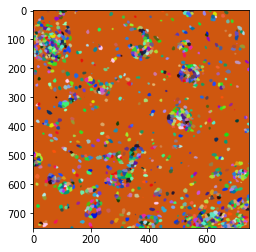

In [57]:
ome_index = 2
begin = begins[ome_index]
end = ends[ome_index]
ome_filename = ome_filenames[ome_index]
ome_path = os.path.join(original_ome_folder, ome_filename)
masks_paths = []
for o, m in ome_and_masks:
    if os.path.basename(o) == ome_filename:
        masks_paths.append(m)
assert len(masks_paths) == 1
masks_path = masks_paths[0]
mask = tifffile.imread(masks_path)

plt.figure()
plt.imshow(np.random.rand(100, 3)[mask % 100])
plt.show()

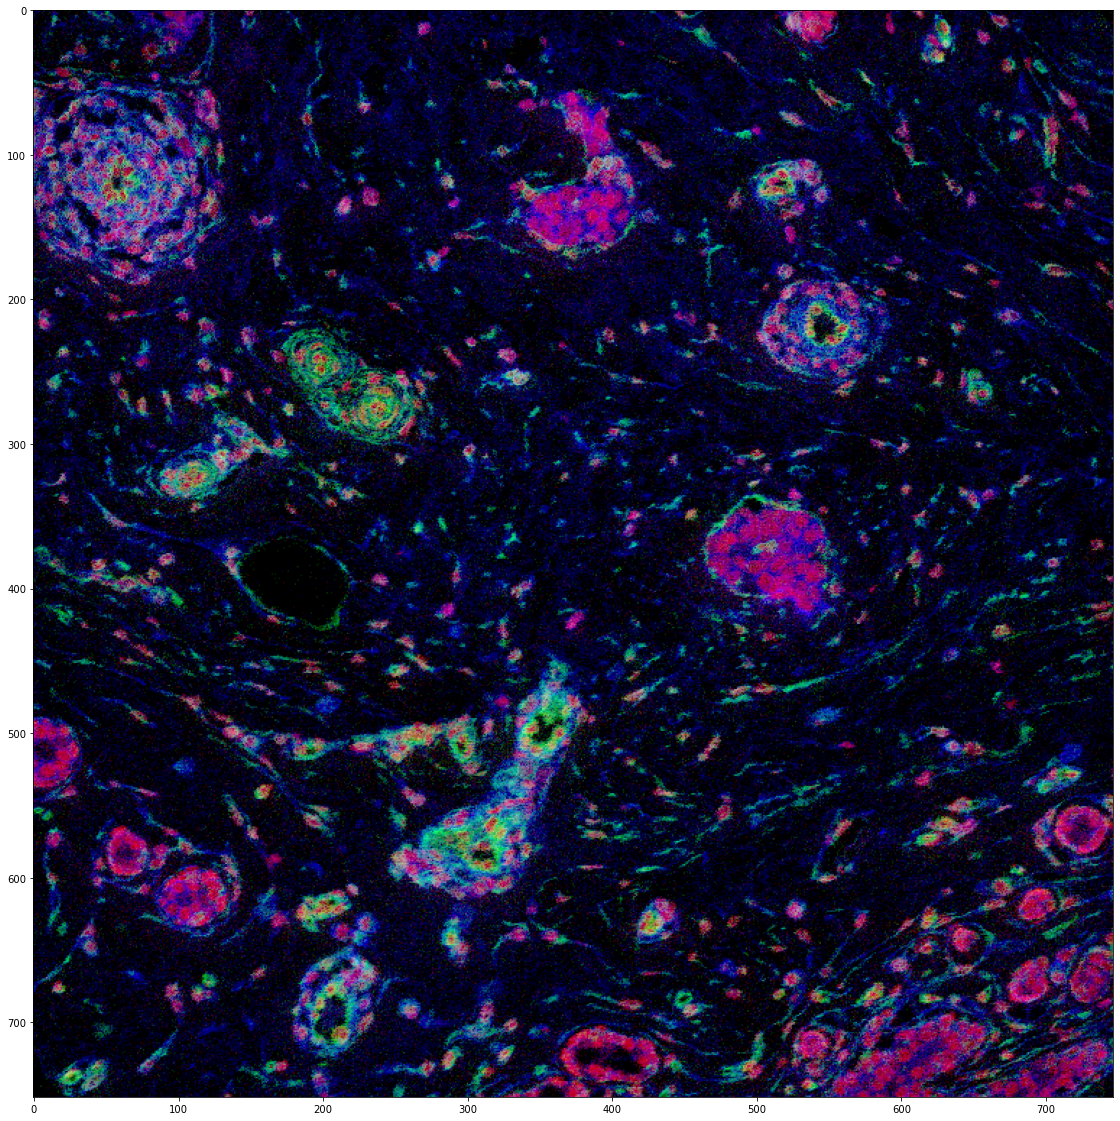

In [58]:
ome = np.arcsinh(np.transpose(tifffile.imread(ome_path)[CHANNELS_TO_KEEP][COOL_CHANNELS], (1, 2, 0)))
a = np.amin(ome, axis=(0, 1))
b = np.amax(ome, axis=(0, 1))
ome = (ome - a) / (b - a)

plt.figure(figsize=(20, 20))
plt.imshow(ome)
plt.show()

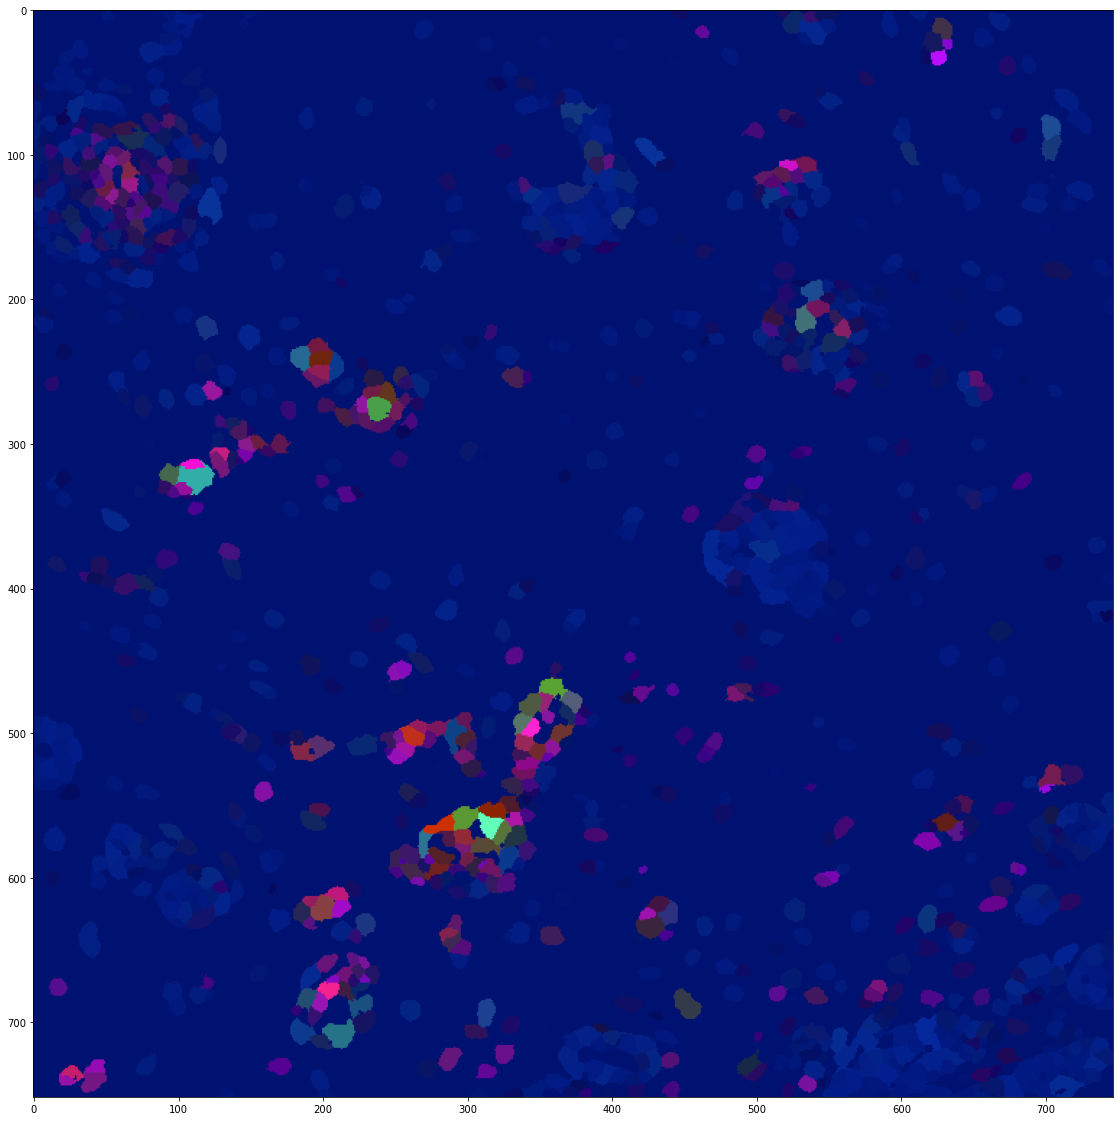

In [68]:
from sklearn.decomposition import PCA

embeddings = all_mus[begin: end, :]
reducer = PCA(3)
pca = reducer.fit_transform(embeddings)
a = np.min(pca, axis=0)
b = np.max(pca, axis=0)
pca = (pca - a) / (b - a)

plt.figure(figsize=(20, 20))
plt.imshow(pca[mask])
plt.show()

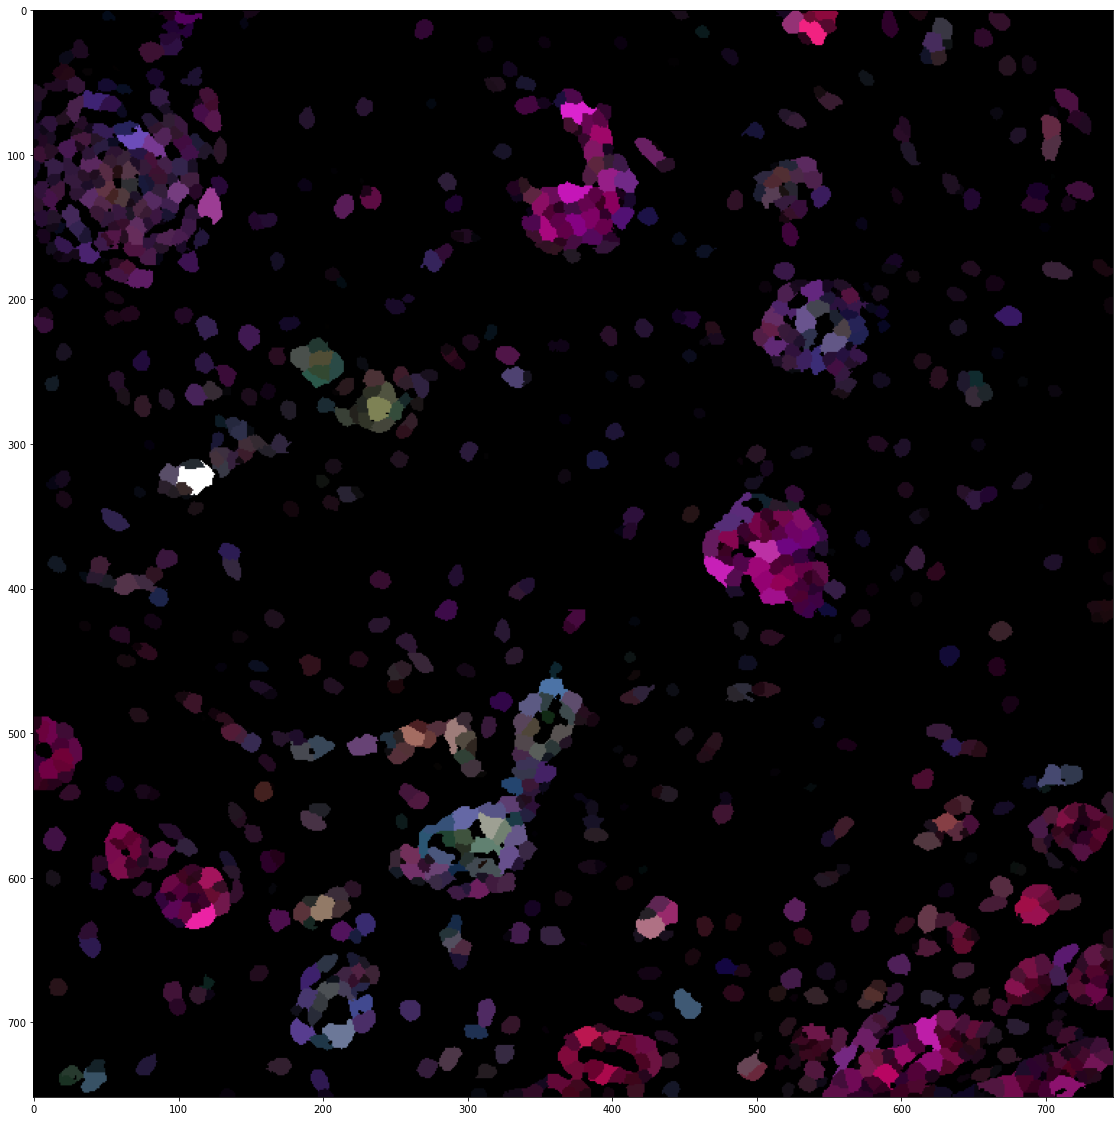

In [64]:
from sklearn.decomposition import PCA
# reducer = PCA(3)
# pca = reducer.fit_transform(embeddings)
# a = np.min(pca, axis=0)
# b = np.max(pca, axis=0)
# pca = (pca - a) / (b - a)
means = all_means[begin: end, :]
a = np.min(means, axis=0)
b = np.max(means, axis=0)
means = (means - a) / (b - a)

plt.figure(figsize=(20, 20))
plt.imshow(means[mask])
plt.show()

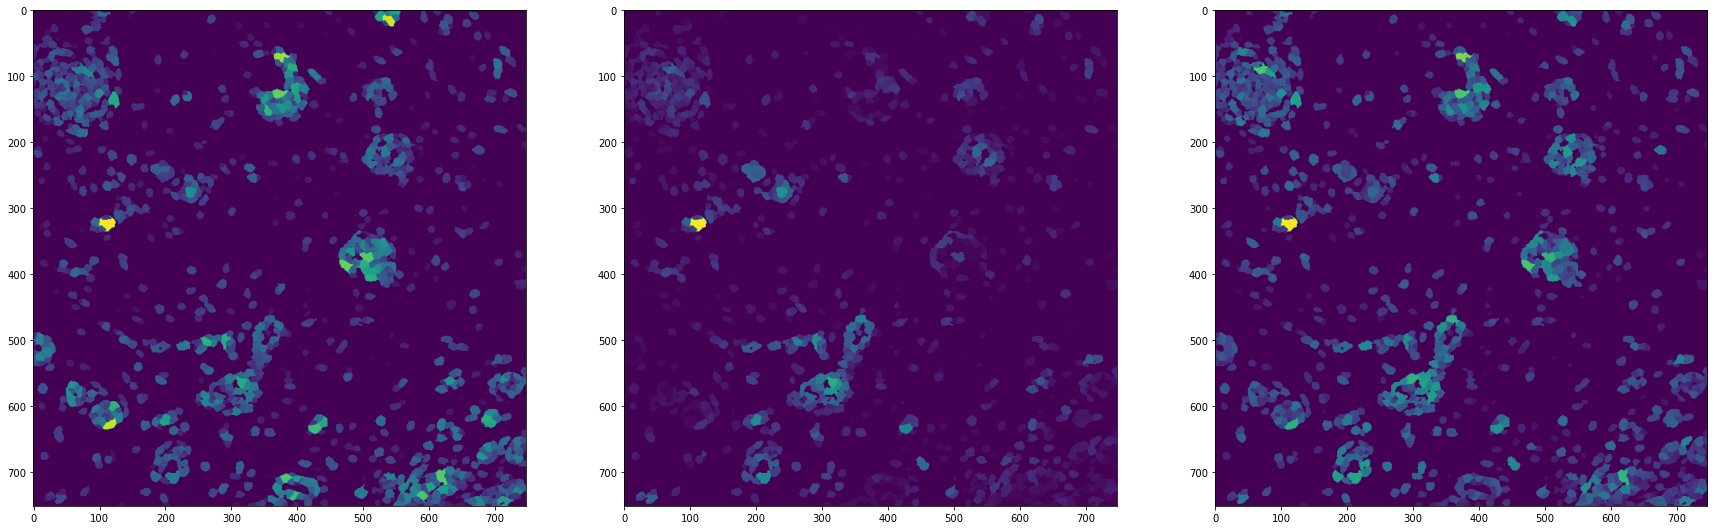

In [67]:
n_channels = means.shape[-1]
l = 10
axes = plt.subplots(1, n_channels, figsize=(n_channels * l, l))[1].flatten()
for c, ax in enumerate(axes):    
    ax.imshow(means[:, c][mask])
plt.show()

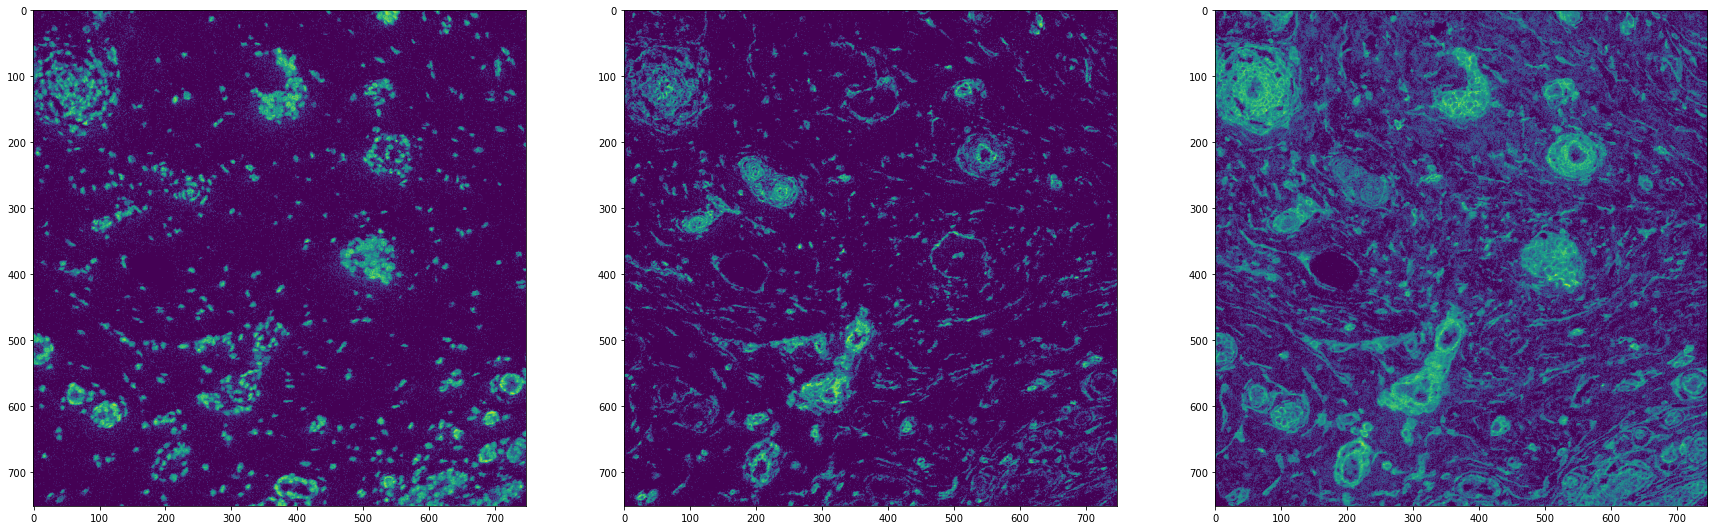

In [69]:
ome = np.arcsinh(np.transpose(tifffile.imread(ome_path)[CHANNELS_TO_KEEP][COOL_CHANNELS], (1, 2, 0)))
a = np.amin(ome, axis=(0, 1))
b = np.amax(ome, axis=(0, 1))
ome = (ome - a) / (b - a)

n_channels = means.shape[-1]
l = 10
axes = plt.subplots(1, n_channels, figsize=(n_channels * l, l))[1].flatten()
for c, ax in enumerate(axes):    
    ax.imshow(ome[:, :, c])